### 4.8: Convolutional AutoEncoder for CIFAR-10

##### **Objective**

The primary objective of this workshop is to delve into `Convolutional Neural Networks (CNNs)`, understand their architecture, and explore how they overcome the limitations of standard `Artificial Neural Networks (ANNs)`, particularly the reliance on fully connected (linear) layers. We will start with the MNIST dataset, apply `CNNs` to CIFAR-10, and then extend this understanding by requiring you to implement a `CNN` for the German Traffic Sign Recognition Benchmark (GTSRB). We will also briefly touch upon `Autoencoders`, their design, and their applications in modern deep learning.

1. **Recognition of ANN Limitations:** Understand why fully connected layers alone may not effectively capture spatial or structural information in image data.
2. **CNN Architecture and Implementation:** Learn the key components of CNNs (convolutions, pooling, activation layers) by applying them to MNIST and CIFAR-10 image classification tasks.
3. **Practical Experience with GTSRB:** Gain hands-on experience by implementing and training a CNN for the German Traffic Sign Recognition Benchmark and posting results in the Discussion Forum.
4. **Introduction to Autoencoders:** Explore the basics of autoencoder architectures, their design principles, and potential uses such as dimensionality reduction and data denoising.

##### **Introduction to CNN and Layers**

Traditional ANNs often use fully connected layers, which treat each input feature independently. While effective in many scenarios, these layers fail to leverage spatial or local correlations in data, particularly in images. Convolutional Neural Networks (CNNs) address this limitation by introducing:

- **Convolutional Layers:** These use filters (kernels) to capture images' local patterns and spatial hierarchies.
- **Pooling Layers:** Reduce spatial dimensions to make the model more robust to small shifts and distortions in the input.
- **Activation Layers:** Nonlinear functions (e.g., ReLU) that introduce nonlinearity and help the network learn complex representations.

##### **Implementation Task: CNN for GTSRB**

The German Traffic Sign Recognition Benchmark (GTSRB) is a real-world dataset containing images of traffic signs under different lighting and weather conditions. Your task is to:

1. Implement a CNN model tailored for GTSRB data.
2. Train and evaluate the model to recognize different types of traffic signs.
3. Share your model’s performance metrics and learning insights in the dedicated Discussion Forum.

##### **Autoencoder Design and Usage**

An autoencoder is a special type of neural network used for tasks such as:

- **Dimensionality Reduction:** Learning efficient data representations in a compressed form.
- **Denoising:** Reconstructing clean inputs from noisy data.

##### **Autoencoders typically consist of two main parts:**

1. **Encoder** – Learns to compress the input into a latent representation.
2. **Decoder** – Reconstructs the original input from this latent space.
These architectures provide a robust framework for unsupervised or self-supervised learning, enabling feature extraction and data understanding beyond straightforward classification or regression tasks.

##### **Task**

1. Design and implement a deep convolutional neural network (CNN) using TensorFlow to classify the CIFAR-10 dataset.
2. Train the model and compare its performance with a baseline CNN regarding accuracy and loss.
3. Analyse the impact of deeper layers on model performance and document key observations.
4. Share your code, results, and comparisons in the workshop's dedicated discussion forum.


##### **Sources**

- https://www.tensorflow.org/tutorials/images/cnn
- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ 
- https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_cl
- https://medium.com/@dbhatt245/mastering-cifar-10-with-tensorflow-from-simple-cnns-to-augmented-deep-models-f852cd6a6871
- https://www.geeksforgeeks.org/deep-learning/cifar-10-image-classification-in-tensorflow/
- https://medium.com/data-science/transfer-learning-in-tensorflow-9e4f7eae3bb4 
- https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb 

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define input shape and number of classes
input_shape = (32, 32, 3)
num_classes = 10

print(f"Training data shape: {train_images.shape}")  
print(f"Test data shape: {test_images.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


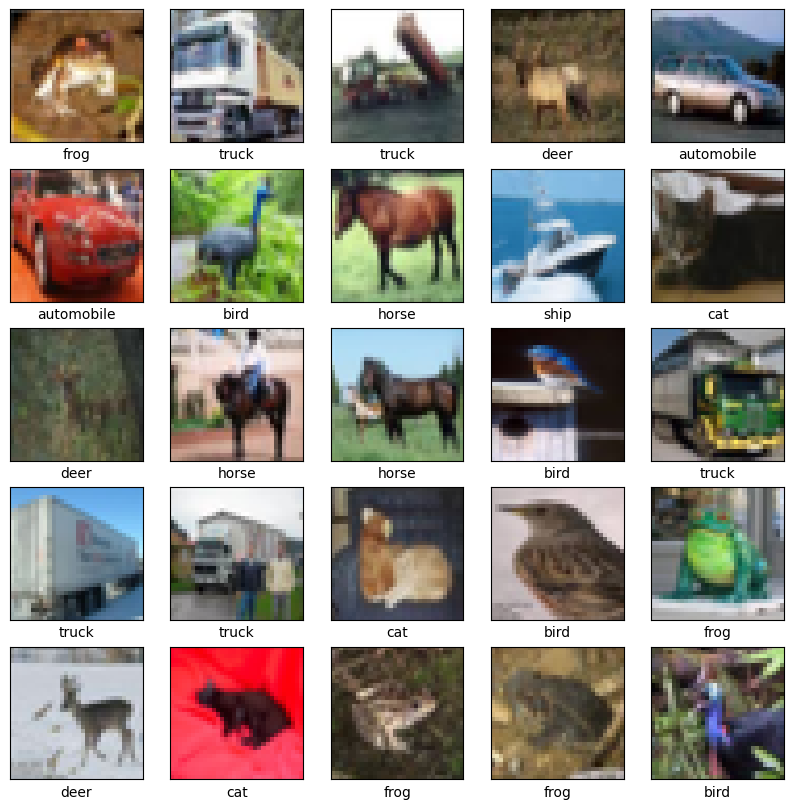

In [14]:
# Verify the data by plotting the first 25 images from the training set and display the class name below each image

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',  
               'dog', 'frog', 'horse', 'ship', 'truck']  

plt.figure(figsize=(10,10))  
for i in range(25):  
    plt.subplot(5,5,i+1)  
    plt.xticks([])  
    plt.yticks([])  
    plt.grid(False)  
    plt.imshow(train_images[i])  
    plt.xlabel(class_names[train_labels[i][0]])  
plt.show()  

In [ ]:
# Define Baseline CNN Model Architecture

# A simple CNN with three Conv2D layers, max pooling, and dense layers. This serves as a performance baseline.

baseline_model = models.Sequential([
    
    layers.Input(shape=input_shape),
    
    # Convolutional layers Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layers Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Classification head
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

baseline_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
# Compile and Train the Baseline CNN Model
# Compile the model with Adam optimizer and sparse categorical crossentropy loss, then train for 10 epochs with validation on the test set.

baseline_model.compile(optimizer='adam',  
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  
                       metrics=['accuracy'])  

baseline_history = baseline_model.fit(train_images, train_labels, epochs=10,   
                                      validation_data=(test_images, test_labels))  

2026-02-15 11:29:22.312957: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2026-02-15 11:29:22.874436: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10


/home/dev-algo/anaconda3/envs/WLV-AI/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 9s 5ms/step - loss: 1.4224 - accuracy: 0.4902 - val_loss: 1.2078 - val_accuracy: 0.5773
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0523 - accuracy: 0.6323 - val_loss: 1.0056 - val_accuracy: 0.6505
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9179 - accuracy: 0.6783 - val_loss: 0.9936 - val_accuracy: 0.6502
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8375 - accuracy: 0.7084 - val_loss: 0.9658 - val_accuracy: 0.6720
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7638 - accuracy: 0.7346 - val_loss: 0.9148 - val_accuracy: 0.6907
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6987 - accuracy: 0.7560 - val_loss: 0.8915 - val_accuracy: 0.6994
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6421 - accuracy: 0.7762 - val_loss: 0.8954 - val_accuracy: 0.7047
Epo

In [ ]:
# Evaluate Baseline CNN Model on Test Set
# Computes final loss/accuracy on test set.

test_loss, test_acc = baseline_model.evaluate(test_images, test_labels, verbose=2)  
print(f'\nBaseline Test Accuracy: {test_acc:.4f}')  

313/313 - 1s - loss: 0.9650 - accuracy: 0.6989 - 643ms/epoch - 2ms/step

Baseline Test Accuracy: 0.6989


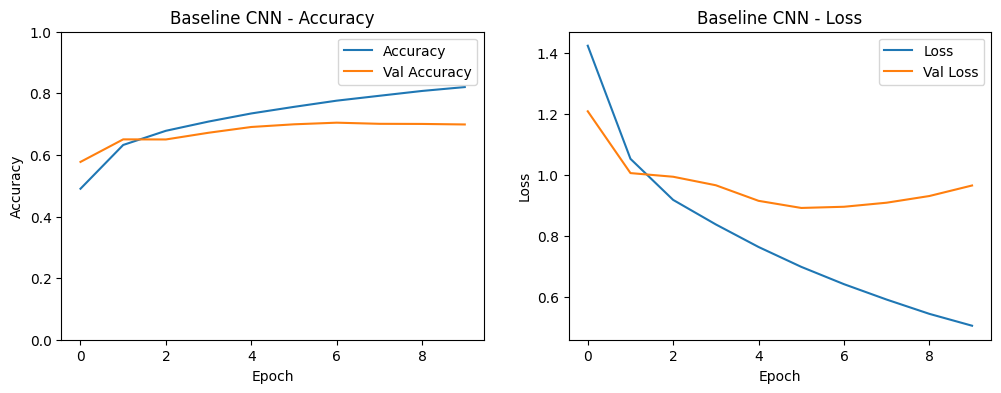

In [18]:
plt.figure(figsize=(12, 4))  

plt.subplot(1, 2, 1)  
plt.plot(baseline_history.history['accuracy'], label='Accuracy')  
plt.plot(baseline_history.history['val_accuracy'], label='Val Accuracy')  
plt.xlabel('Epoch')  
plt.ylabel('Accuracy')  
plt.ylim([0, 1])  
plt.legend()  
plt.title('Baseline CNN - Accuracy')  

plt.subplot(1, 2, 2)  
plt.plot(baseline_history.history['loss'], label='Loss')  
plt.plot(baseline_history.history['val_loss'], label='Val Loss')  
plt.xlabel('Epoch')  
plt.ylabel('Loss')  
plt.legend()  
plt.title('Baseline CNN - Loss')  

plt.show()  

In [ ]:
# Define Deeper VGG-inspired CNN
# A deeper model with three VGG blocks (two Conv2D per block), dropout for regularization.
# ~3.7M parameters. VGG blocks use same padding for dimension preservation, He uniform initialization for ReLU, and increasing dropout (0.2-0.5) to combat overfitting. This captures more complex features.

deep_model = models.Sequential([  
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),  
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),  
    layers.MaxPooling2D((2, 2)),  
    layers.Dropout(0.2),  
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),  
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),  
    layers.MaxPooling2D((2, 2)),  
    layers.Dropout(0.3),  
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),  
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),  
    layers.MaxPooling2D((2, 2)),  
    layers.Dropout(0.4),  
    layers.Flatten(),  
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),  
    layers.Dropout(0.5),  
    layers.Dense(10)  
])  

deep_model.summary()  

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [20]:
deep_model.compile(optimizer='adam',  
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  
                   metrics=['accuracy'])  

deep_history = deep_model.fit(train_images, train_labels, epochs=50,   
                              validation_data=(test_images, test_labels)) 

2026-02-15 11:44:06.151104: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50


2026-02-15 11:44:07.905078: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 21s 11ms/step - loss: 1.7025 - accuracy: 0.3642 - val_loss: 1.3285 - val_accuracy: 0.5079
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2948 - accuracy: 0.5345 - val_loss: 1.0365 - val_accuracy: 0.6358
Epoch 3/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1103 - accuracy: 0.6086 - val_loss: 0.9647 - val_accuracy: 0.6607
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0046 - accuracy: 0.6472 - val_loss: 0.9351 - val_accuracy: 0.6768
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9417 - accuracy: 0.6744 - val_loss: 0.8229 - val_accuracy: 0.7117
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8977 - accuracy: 0.6882 - val_loss: 0.8587 - val_accuracy: 0.6980
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8623 - accuracy: 0.7011 - val_loss: 0.7713 - val_accura

In [21]:
test_loss, test_acc = deep_model.evaluate(test_images, test_labels, verbose=2)  
print(f'\nDeeper Test Accuracy: {test_acc:.4f}')  

313/313 - 1s - loss: 0.6258 - accuracy: 0.7970 - 881ms/epoch - 3ms/step

Deeper Test Accuracy: 0.7970


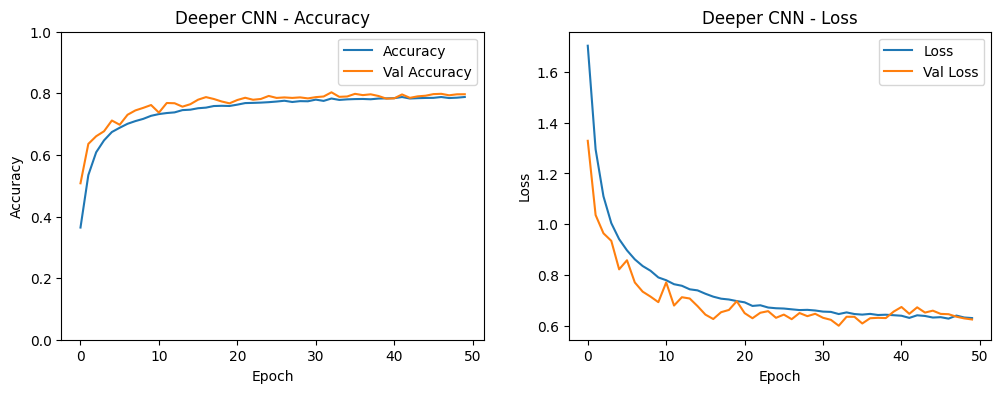

In [22]:
plt.figure(figsize=(12, 4))  

plt.subplot(1, 2, 1)  
plt.plot(deep_history.history['accuracy'], label='Accuracy')  
plt.plot(deep_history.history['val_accuracy'], label='Val Accuracy')  
plt.xlabel('Epoch')  
plt.ylabel('Accuracy')  
plt.ylim([0, 1])  
plt.legend()  
plt.title('Deeper CNN - Accuracy')  

plt.subplot(1, 2, 2)  
plt.plot(deep_history.history['loss'], label='Loss')  
plt.plot(deep_history.history['val_loss'], label='Val Loss')  
plt.xlabel('Epoch')  
plt.ylabel('Loss')  
plt.legend()  
plt.title('Deeper CNN - Loss')  

plt.show()  

In [24]:
# Compare Models

import pandas as pd

data = {  
    'Model': ['Baseline', 'Deeper VGG-like'],  
    'Test Accuracy': [baseline_history.history['val_accuracy'][-1], deep_history.history['val_accuracy'][-1]],  
    'Test Loss': [baseline_history.history['val_loss'][-1], deep_history.history['val_loss'][-1]]  
}  

df = pd.DataFrame(data)  
display(df)

,Model,Test Accuracy,Test Loss
0,Baseline,0.6989,0.965024
1,Deeper VGG-like,0.7970,0.625799


In [32]:
def plot_predictions(model, index):  
    img = test_images[index]  
    true_label = class_names[test_labels[index][0]]  
    pred_probs = model.predict(np.expand_dims(img, axis=0))[0]  
    pred_label = class_names[np.argmax(pred_probs)]  
      
    plt.imshow(img)  
    plt.title(f"True: {true_label} | Pred: {pred_label}")  
    plt.axis('off')  
    plt.show()
    
# plot_predictions(baseline_model, 0)
# plot_predictions(deep_model, 0)  

1/1 [==============================] - 0s 15ms/step


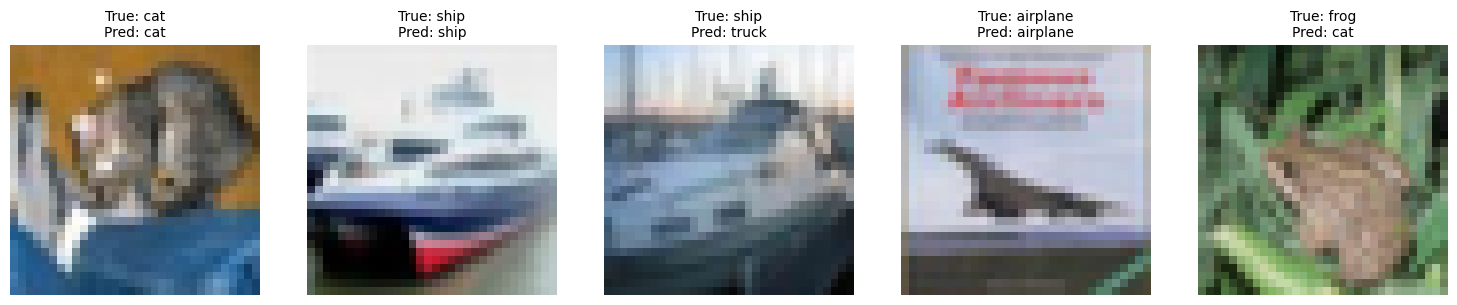

In [ ]:
# Baseline model predictions on a batch of test images

num_images = 5
images = test_images[:num_images]
true_labels = [class_names[test_labels[i][0]] for i in range(num_images)]

# Predict on the batch
pred_probs = baseline_model.predict(images)
pred_labels = [class_names[np.argmax(prob)] for prob in pred_probs]

# Create a figure with subplots in a row
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))  # 1 row, 5 columns

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}", fontsize=10)
    ax.axis('off')

plt.tight_layout()  # Adjust spacing
plt.show()

1/1 [==============================] - 0s 421ms/step


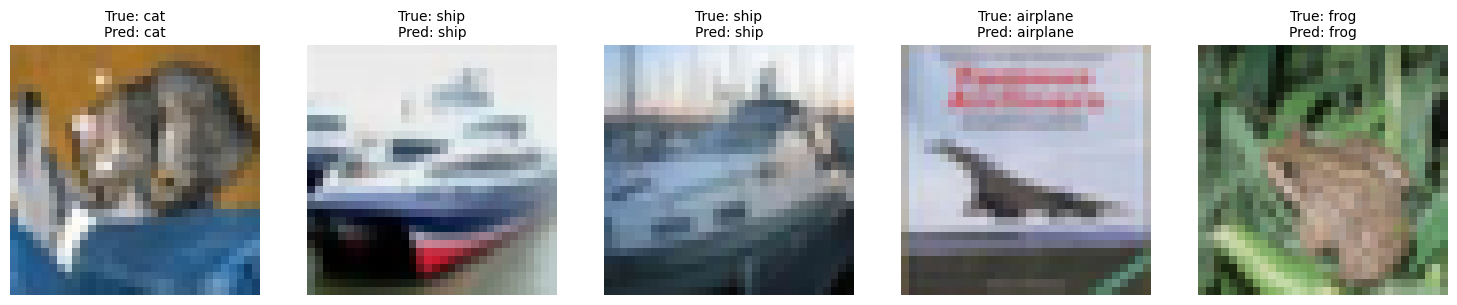

In [30]:
# Select the first 5 test images and labels
num_images = 5
images = test_images[:num_images]
true_labels = [class_names[test_labels[i][0]] for i in range(num_images)]

# Predict on the batch
pred_probs = deep_model.predict(images)
pred_labels = [class_names[np.argmax(prob)] for prob in pred_probs]

# Create a figure with subplots in a row
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))  # 1 row, 5 columns

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}", fontsize=10)
    ax.axis('off')

plt.tight_layout()  # Adjust spacing
plt.show()